# Workshop 1
## Manolo Ramírez Pintor
## A01706155

## 2.3 Challenge: Data management and descriptive statistics.

In [23]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

### Download daily prices for Bitcoin from 2017:

In [24]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

### Show the content of the data:

In [25]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
...,...,...,...,...,...,...
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,2.857554e+10,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,2.355572e+10,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,3.283743e+10,23947.642578


### Python automatically shows you only the first and last rows of the dataset. Now show the last quotations:

In [26]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,2.857554e+10,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,2.355572e+10,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,3.283743e+10,23947.642578
2022-08-11,24822.628906,23900.996094,23948.345703,23957.529297,3.712704e+10,23957.529297
2022-08-13,24465.701172,24350.863281,24384.033203,24465.701172,2.710286e+10,24465.701172


### Import the matplotlib and do a plot for the Bitcoin closing prices:

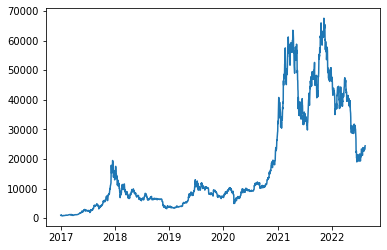

In [27]:
import matplotlib
from matplotlib.pyplot import*
from matplotlib import pyplot
plot(BTC["Close"])
show()

### We can check the data types of each variable (column) in the dataset:

In [28]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2050 entries, 2017-01-01 to 2022-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2050 non-null   float64
 1   Low        2050 non-null   float64
 2   Open       2050 non-null   float64
 3   Close      2050 non-null   float64
 4   Volume     2050 non-null   float64
 5   Adj Close  2050 non-null   float64
dtypes: float64(6)
memory usage: 112.1 KB


## 2.3.2.3 Continuously compounded returns

In [29]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.000413
2022-08-13    0.021211
Name: R, Length: 2050, dtype: float64


## Now we calculate cc returns in a new column using the shift function:

In [30]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

#### We have a null value for the first day since we cannot calculate returns for day 1. We can drop the rows with NA values to ease data calculations:

In [31]:
BTC= BTC.dropna()

## 2.3.2.4 Descriptive statistics of returns

In [32]:
sumret = BTC["R"].describe()
sumret

count    2049.000000
mean        0.002425
std         0.041361
min        -0.371695
25%        -0.015882
50%         0.002217
75%         0.020958
max         0.252472
Name: R, dtype: float64

### To know which days were the worse, we can do a selection based on a condition. Let’s see which days had a daily return less than 15%:

In [33]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2.716310e+09,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,1.885380e+10,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9.285290e+09,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,5.398036e+10,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,6.820456e+10,22487.388672,-0.159747,-0.174053


### To know the best days for Bitcoin:

In [34]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,1.795070e+10,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2.249260e+09,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,1.265630e+10,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,1.014672e+11,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,5.100073e+10,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,2.131505e+10,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,2.870507e+10,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1.201760e+09,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4.148070e+09,3637.520020,0.152956,0.142330


#### We can also get the main descriptive statistics using specific functions like:



In [35]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015612242931611396
The daily variance of Bitcoin is  0.0017365856201850699
The daily standard deviation (volatility) of Bitcoin return is  0.04167236038653282
The daily median return of Bitcoin is  0.0022150257023572095


## 3.2 CHALLENGES: Histogram

* Do a histogram for daily Bitcoin cc returns. Hints: use the plot.hist function for pandas dataframes, and the BTC dataframe.

* Interpret the histogram with your own words and in CAPITAL LETTERS

### Histogram:

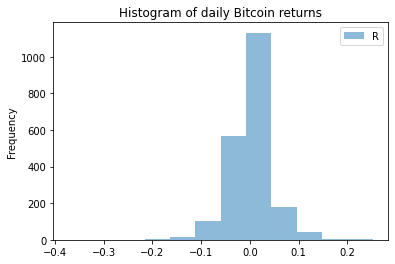

In [36]:
# Hints: use the plot.hist
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin returns")

### Interpretation
* MY ANALYSIS AND INTERPRETATION OF THIS HISTOGRAM MAKES ME THINK THAT THERE ARE MORE POSITIVE VALUES JUDGING BY THE FREQUENCY BARS VISUALLY, THE NEGATIVE VALUES ARE LOWER, MEANING THAT IT CAN BE POSSIBLE TO EARN MORE ON AN INVESTMENT THAN HAVING A MAJOR LOSS.

## 5 The Normal Distribution Function


## 5.2 CHALLENGE: Simulating the normal distribution

Use the mean and standard deviation of the historical cc returns of Bitcoin and simulate the same # of returns as the days we dowloaded in the BTC dataframe.

In one plot show both, the real distribution of historical cc returns and the simulated normal distribution.

DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS? BRIEFLY EXPLAIN.

0.0024246626923516176
0.04136076658984647
2049


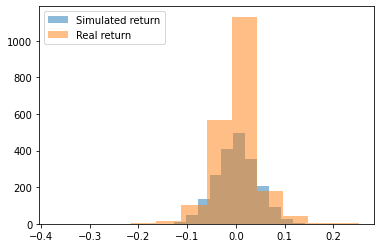

In [37]:
# Debug info:
print(BTC["R"].mean())
print(BTC["R"].std())
print(len(BTC.axes[0]))


# Ayuda no se como se como se imprime la distribución real aaaaa
# Ahora si fdjsfj

Simulated_return = np.random.normal(loc = BTC["R"].mean(), scale = BTC["R"].std(), size = len(BTC.axes[0]))

# pd.DataFrame(Simulated_return).plot.hist(bins=12, alpha=0.5, title="Simulation of normal distribution", label="owo")
# pd.DataFrame(r_bitcoin).plot.hist(bins=12, alpha=0.5, label="uwu")

pyplot.hist(Simulated_return, bins = 12, alpha = 0.5, label = "Simulated return")
pyplot.hist(r_bitcoin, bins = 12, alpha = 0.5, label = "Real return")
pyplot.legend(loc="upper left")
pyplot.show()


#### Difference between real vs simulated returns
* THE DIFFERENCE BETWEEN THE REAL AND THE SIMULATED RETURNS INDICATES THAT THE SIMULATED ONE HAS HIGHTER VALUES THAN THE REAL ONE SINCE THE SIMULATION IS AN EXTIMATE TAKEN BY THE MEAN AND THE STANDARD DEVIATION.